In [179]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns
import matplotlib as mpl
from sklearn.metrics import mean_squared_error as mse

In [122]:
url="https://raw.githubusercontent.com/nlihin/data-analytics/main/datasets/youtube/youtube_US_short.csv"
data=pd.read_csv(url)
data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [123]:
max_v = data['views'].max()
max_v = data[data['views']==max_v]
max_v.loc[:,['publish_time','views','title']]


,publish_time,views,title
6181,2017-12-06T17:58:51.000Z,149376127,YouTube Rewind: The Shape of 2017 | #YouTubeRe...


In [124]:
data.groupby('channel_title')[['views']].max().head(3)

,views
channel_title,
12 News,92327
1theK (원더케이),2827100
20th Century Fox,12382809


In [125]:
spearman= data[['likes', 'dislikes','views','comment_count']].corr(method='spearman')
spearman

,likes,dislikes,views,comment_count
likes,1.000000,0.801154,0.877789,0.881849
dislikes,0.801154,1.000000,0.866979,0.843331
views,0.877789,0.866979,1.000000,0.840532
comment_count,0.881849,0.843331,0.840532,1.000000


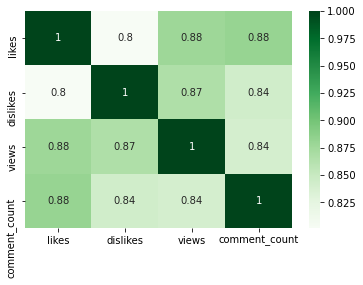

In [126]:
sns.heatmap(data=spearman,cmap='Greens', annot=True)

views  likes            0.877789
likes  comment_count    0.881849
dtype: float64
MultiIndex([('views',         'likes'),
            ('likes', 'comment_count')],
           )


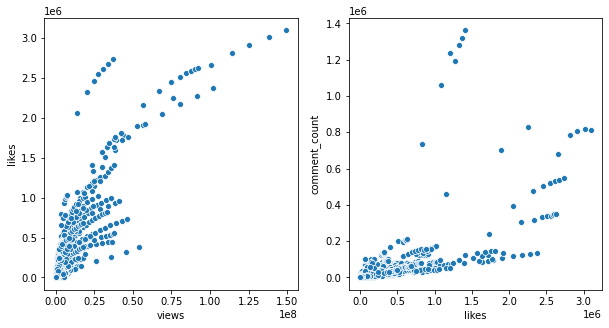

In [127]:
fig,axes = plt.subplots(1,2, figsize = (10,5))#split the plots
corr_plt = spearman.unstack().sort_values()[-7:-5]#orgenize the data from the smallest to the biggest and get the max valuse that are not 1 and repeat on them self
title_corr = pd.Series.keys(corr_plt)#we did it in order to make the write titles for the axes
print(corr_plt)
print(title_corr)
plt1 = sns.scatterplot(ax=axes[0],data=data,x=title_corr[0][0],y=title_corr[0][1])
plt2 = sns.scatterplot(ax=axes[1],data=data,x=title_corr[1][0],y=title_corr[1][1])

In [128]:
data['year'] = pd.DatetimeIndex(data.publish_time).year
data_temp = data[(data['year']==2017)|(data['year']==2018)]
data_temp.pivot_table('views', index='category_id', columns='year',aggfunc='sum')

year,2017,2018
category_id,,
1,8.654615e+08,144072937.0
2,7.885352e+07,8047346.0
10,4.504741e+09,839810930.0
15,1.442459e+08,32629265.0
17,3.812432e+08,61660329.0
19,5.429144e+07,7583452.0
20,5.035442e+07,84176667.0
22,7.018258e+08,67849434.0
23,1.130782e+09,197147385.0


In [193]:
NBA_data = pd.read_csv('https://raw.githubusercontent.com/ShaiYona/Data-Science2021B/main/Assignments/4/nba.csv')
NBA_data

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24.0,C,26.0,7-0,231.0,Kansas,947276.0


In [194]:
NBA_data=NBA_data.dropna()
NBA_data.head(3).loc[:,['Age','Height','Weight','Salary']]

,Age,Height,Weight,Salary
0,25.0,6-2,180.0,7730337.0
1,25.0,6-6,235.0,6796117.0
3,22.0,6-5,185.0,1148640.0


In [195]:
def parse_ht(ht):
    ht_ = ht.split("-")
    ft_ = float(ht_[0])
    in_ = float(ht_[1])
    return (12*ft_) + in_
NBA_data["Height"]=NBA_data["Height"].apply(lambda x:parse_ht(x))

<ipython-input-195-214862e70494>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NBA_data["Height"]=NBA_data["Height"].apply(lambda x:parse_ht(x))


In [196]:
NBA_data.head(3).loc[:,['Age','Height','Weight','Salary']]

,Age,Height,Weight,Salary
0,25.0,74.0,180.0,7730337.0
1,25.0,78.0,235.0,6796117.0
3,22.0,77.0,185.0,1148640.0


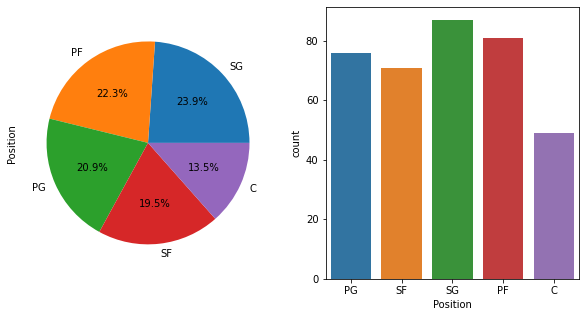

In [197]:
pos = NBA_data['Position']
fig, axes = plt.subplots(nrows=1, ncols=2)
sns.countplot(ax=axes[1],x="Position",  data=NBA_data)
pos.value_counts().plot.pie(ax=axes[0],figsize=(10,5),autopct="%1.1f%%")

In [210]:
features = ['Age','Height','Weight']
label = ['Salary']
X = NBA_data[features]
y = NBA_data[label]
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.3, random_state=42) 
print(X_train.head(),'\n',y_test.head())

      Age  Height  Weight
332  22.0    79.0   232.0
285  26.0    78.0   220.0
191  26.0    75.0   208.0
24   21.0    83.0   200.0
181  33.0    81.0   245.0 
         Salary
232  2085671.0
42   1636842.0
19   6300000.0
435  3075880.0
71   3553917.0


In [211]:
NBA_model = DecisionTreeRegressor(random_state=42)
NBA_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [212]:
def eval(x_test,y_test,model):
    pred = model.predict(x_test)
    print("MSE: {:.3f}".format(mse(pred,y_test,squared=False)))

In [213]:
NBA_model.predict(X_test)

array([ 2500000.        ,   947276.        ,  5378974.        ,
       16407500.        ,  1252440.        ,  7070730.        ,
        2814000.        ,   947276.        ,  3156600.        ,
       10050000.        ,   947276.        ,  2869440.        ,
        1535880.        ,  5000000.        ,  2500000.        ,
         525093.        ,   947276.        ,  8500000.        ,
       22875000.        ,  1140240.        ,  1015421.        ,
        5000000.        ,  2109294.        ,  1779866.66666667,
        2170465.        ,   981348.        ,  6331404.        ,
        2612520.        ,  1779866.66666667,  2000000.        ,
        3344000.        , 18671659.        ,  2525160.        ,
         306527.        ,  1035000.        ,  2612520.        ,
       20093064.        ,  6500000.        ,  3156600.        ,
        1000000.        ,  9463484.        ,  4290000.        ,
       15851950.        ,  3036927.        ,  1394640.        ,
         947276.        ,   981348.     

In [214]:
eval(X_test,y_test,NBA_model)

MSE: 6984632.180


In [215]:
NBA_data_P = pd.get_dummies(NBA_data['Position'])
Temp_NBA_data = pd.concat([NBA_data,NBA_data_P],axis=1)
Temp_NBA_data

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,C,PF,PG,SF,SG
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,74.0,180.0,Texas,7730337.0,0,0,1,0,0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,78.0,235.0,Marquette,6796117.0,0,0,0,1,0
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,77.0,185.0,Georgia State,1148640.0,0,0,0,0,1
6,Jordan Mickey,Boston Celtics,55.0,PF,21.0,80.0,235.0,LSU,1170960.0,0,1,0,0,0
7,Kelly Olynyk,Boston Celtics,41.0,C,25.0,84.0,238.0,Gonzaga,2165160.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,Rodney Hood,Utah Jazz,5.0,SG,23.0,80.0,206.0,Duke,1348440.0,0,0,0,0,1
451,Chris Johnson,Utah Jazz,23.0,SF,26.0,78.0,206.0,Dayton,981348.0,0,0,0,1,0
452,Trey Lyles,Utah Jazz,41.0,PF,20.0,82.0,234.0,Kentucky,2239800.0,0,1,0,0,0
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,75.0,203.0,Butler,2433333.0,0,0,1,0,0


In [216]:
features = ['Age','Height','Weight','PG','SG','SF','PF','C']
label = ['Salary']
X = Temp_NBA_data[features]
y = Temp_NBA_data[label]
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.3, random_state=42) 
print(X_train.head(),'\n',y_test.head())

      Age  Height  Weight  PG  SG  SF  PF  C
332  22.0    79.0   232.0   0   0   1   0  0
285  26.0    78.0   220.0   0   1   0   0  0
191  26.0    75.0   208.0   1   0   0   0  0
24   21.0    83.0   200.0   0   0   0   1  0
181  33.0    81.0   245.0   0   0   0   0  1 
         Salary
232  2085671.0
42   1636842.0
19   6300000.0
435  3075880.0
71   3553917.0


In [217]:
Temp_NBA_model = DecisionTreeRegressor(random_state=42)
Temp_NBA_model.fit(X_train, y_train)
eval(X_test,y_test,Temp_NBA_model)

MSE: 6281217.825


In [218]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train,y_train)
print("Depth:",model.get_depth())
eval(X_test,y_test,model)

Depth: 19
MSE: 6751751.018


In [232]:
model = DecisionTreeClassifier(max_depth=1,random_state=42)
model.fit(X_train,y_train)
print("Depth:",model.get_depth())
eval(X_test,y_test,model)

Depth: 1
MSE: 6175120.055


In [324]:
url = 'https://raw.githubusercontent.com/nlihin/data-analytics/main/datasets/avocado.csv'
avocado = pd.read_csv(url)
avocado.head()

,Unnamed: 0,Date,AveragePrice,total_sold,small_sold,large_sold,sma,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27/12/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20/12/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13/12/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06/12/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29/11/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [325]:
avocado_gr= avocado.groupby(['year','region'])['total_sold'].sum().unstack()
avocado_gr

region,Albany,Atlanta,BaltimoreWashington,Boise,Boston,BuffaloRochester,California,Charlotte,Chicago,CincinnatiDayton,...,SouthCarolina,SouthCentral,Southeast,Spokane,StLouis,Syracuse,Tampa,TotalUS,West,WestTexNewMexico
year,,,,,,,,,,,,,,,,,,,,,
2015,4029896.43,23231698.12,40645579.54,3784357.34,27454991.64,5893234.60,3.014074e+08,9487343.42,41494716.53,11756176.00,...,16245866.66,2.904546e+08,1.600952e+08,4181687.17,9902575.24,2734333.26,17131597.85,1.657255e+09,3.046703e+08,41523998.11
2016,5264335.59,28326878.30,40893802.32,4653509.53,30571315.07,7205112.01,3.261884e+08,10586721.00,39612636.02,14020866.38,...,18702858.00,3.040987e+08,1.981215e+08,5006166.54,10644475.60,3429368.74,21680749.36,1.819159e+09,3.445773e+08,43807431.60
2017,5231581.78,28815119.98,41015634.46,4760561.31,30610672.16,7740305.75,3.176445e+08,11895590.40,40980754.35,15146677.90,...,19968966.90,3.254226e+08,1.967373e+08,5151528.30,8988122.50,3731978.02,20550137.10,1.864694e+09,3.450544e+08,47389589.29
2018,1541986.17,8231422.45,12158903.00,1214759.57,8637005.96,2123818.04,8.374131e+07,3585889.60,11614231.61,3598287.29,...,5836081.34,9.130371e+07,6.028447e+07,1225893.47,2537659.99,1046987.66,6642055.00,5.236323e+08,9.247709e+07,11800820.78


In [326]:
D_df = avocado[(avocado['region']=='Denver')&(avocado['year']==2016)]
D_df
#104 rows

,Unnamed: 0,Date,AveragePrice,total_sold,small_sold,large_sold,sma,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
3432,0,25/12/2016,1.04,765511.40,123942.37,206365.38,15600.07,419603.58,267985.33,151602.51,15.74,conventional,2016,Denver
3433,1,18/12/2016,1.04,705750.83,116069.90,232182.60,10972.28,346526.05,246935.09,99582.36,8.60,conventional,2016,Denver
3434,2,11/12/2016,0.95,764135.24,110202.78,219903.74,11427.65,422601.07,303762.84,118838.23,0.00,conventional,2016,Denver
3435,3,04/12/2016,0.91,855989.02,129940.92,277374.59,11512.69,437160.82,141279.50,295881.32,0.00,conventional,2016,Denver
3436,4,27/11/2016,1.30,455469.67,86311.53,131940.87,14113.35,223103.92,81706.03,141397.89,0.00,conventional,2016,Denver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12604,47,31/01/2016,0.95,55371.00,6587.57,6336.15,40.64,42406.64,14951.47,27455.17,0.00,organic,2016,Denver
12605,48,24/01/2016,0.86,45127.01,7581.40,5040.24,29.68,32475.69,15028.15,17447.54,0.00,organic,2016,Denver
12606,49,17/01/2016,1.15,22059.78,6052.49,3670.46,23.12,12313.71,1737.61,10576.10,0.00,organic,2016,Denver
12607,50,10/01/2016,0.77,63531.61,4369.82,10784.78,55.07,48321.94,980.62,47341.32,0.00,organic,2016,Denver


In [327]:
D_df.total_sold.mean()

435651.5581730769

In [328]:
D_df['month'] = pd.DatetimeIndex(D_df.Date).month
N_D_df = D_df[D_df['month']==9]
N_D_df['Total Bags'].sum()

<ipython-input-328-03bd42f9b926>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  D_df['month'] = pd.DatetimeIndex(D_df.Date).month


1140308.8800000001

In [329]:
avocado.head()

,Unnamed: 0,Date,AveragePrice,total_sold,small_sold,large_sold,sma,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27/12/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20/12/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13/12/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06/12/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29/11/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


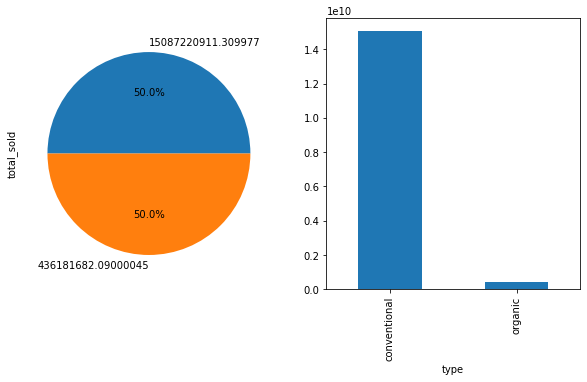

In [330]:
avocado_types_sales= avocado.groupby(['type'])['total_sold'].sum()
fig, axes = plt.subplots(nrows=1, ncols=2)
#sns.countplot(ax=axes[1],x="total_sold",hue='type', data=avocado)
avocado_types_sales.value_counts().plot.pie(ax=axes[0],figsize=(10,5),autopct="%1.1f%%")
avocado_types_sales.plot.bar(ax=axes[1],figsize=(10,5))

In [334]:
fet=['AveragePrice', 'Total Bags', 'total_sold','year']
temp_avocado = pd.get_dummies(avocado['type'])
temp_avocado = pd.concat([temp_avocado,avocado[fet]],axis=1)
corr_avocado=temp_avocado[fet].corr()
corr_avocado
temp_avocado

,conventional,organic,AveragePrice,Total Bags,total_sold,year
0,1,0,1.33,8696.87,64236.62,2015
1,1,0,1.35,9505.56,54876.98,2015
2,1,0,0.93,8145.35,118220.22,2015
3,1,0,1.08,5811.16,78992.15,2015
4,1,0,1.28,6183.95,51039.60,2015
...,...,...,...,...,...,...
18244,0,1,1.63,13498.67,17074.83,2018
18245,0,1,1.71,9264.84,13888.04,2018
18246,0,1,1.87,9394.11,13766.76,2018
18247,0,1,1.93,10969.54,16205.22,2018


In [336]:
NEW_fet = ['AveragePrice', 'Total Bags', 'total_sold', 'conventional','organic']
temp_avocado = pd.concat([temp_avocado,avocado['year']],axis=1) 
corr_plt = corr_avocado.unstack().sort_values()[-7:-6]#orgenize the data from the smallest to the biggest and get the max valuse that are not 1 and repeat on them self
title_corr = pd.Series.keys(corr_plt)#we did it in order to make the write titles for the axes
print(corr_plt)
print(title_corr[0][1])
plt1 = sns.scatterplot(data=temp_avocado,x=title_corr[0][0],y=title_corr[0][1],hue='year')

year  AveragePrice    0.093197
dtype: float64
AveragePrice


ValueError: Shape of passed values is (2, 6), indices imply (18249, 6)